In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [18]:
#Obtenemos los datos
data1 = pd.read_csv('reprocessed.hungarian.data',sep=' ')
data1 = np.array(data1.dropna())
X = np.array(data1[:,:12])
Y = np.array(data1[:,13])
Y[Y > 1] = 1
print(np.shape(X))
print(np.shape(Y))

(293, 12)
(293,)


In [19]:
eBAG = []
eFORC = []
eOOBBag = []
eOOBFRC = []
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
#El B es el numero de boothstrapping y el numero de arboles de nuestro bosque.
n_boot = 300
for i in range(n_boot):
    bstrRegr = BaggingClassifier(n_estimators=i+1)
    bOOBRegr = BaggingClassifier(n_estimators=i+1,oob_score=True)
    bstrRegr.fit(X_train, Y_train)
    #camaleon = bstrRegr.predict_proba(X_validation)[:,0]
    #eBAG.append(log_loss(Y_validation,camaleon))
    eBAG.append(np.mean(-1*cross_val_score(bstrRegr, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    bOOBRegr.fit(X_train, Y_train)
    #camaleon1 = bOOBRegr.predict_proba(X_validation)[:,0]
    #eOOBBag.append(log_loss(Y_validation,camaleon1))
    eOOBBag.append(np.mean(-1*cross_val_score(bOOBRegr, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    clf = RandomForestClassifier(n_estimators=i+1)
    clfoob = RandomForestClassifier(n_estimators=i+1,oob_score=True)
    clf.fit(X_train, Y_train) 
    #camaleon2 = clf.predict_proba(X_validation)[:,0]
    #eFORC.append(log_loss(Y_validation,camaleon2))
    eFORC.append(np.mean(-1*cross_val_score(clf, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    clfoob.fit(X_train, Y_train) 
    #camaleon3 = clfoob.predict_proba(X_validation)[:,0]
    #eOOBFRC.append(log_loss(Y_validation,camaleon3))
    eOOBFRC.append(np.mean(-1*cross_val_score(clfoob, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few

(300,)


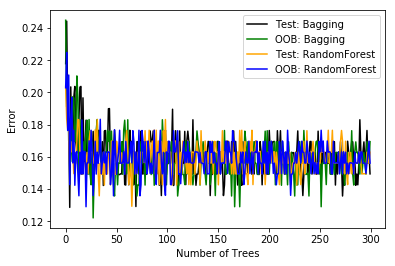

In [20]:
print(np.shape(eBAG))
x=np.arange(n_boot)
plt.plot(x, eBAG, c = 'black', label='Test: Bagging')
plt.plot(x,eOOBBag, c='g', label='OOB: Bagging')
plt.plot(x, eFORC,  c='orange', label='Test: RandomForest')
plt.plot(x,eOOBFRC, c='blue', label='OOB: RandomForest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()

In [25]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X1 = np.array(data[["WeekofPurchase","StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH","SalePriceMM","SalePriceCH","PriceDiff","PctDiscMM","PctDiscCH","ListPriceDiff","STORE"]])
Y1 = np.array(data['Purchase'])
Y1[Y1=='CH'] = 0
Y1[Y1=='MM'] = 1
#print(np.shape(X1))
#print(np.shape(Y1))
pY1.dtype)

object


In [16]:
e1 = []
e2 = []
e3 = []
n_boot2 = 500
p=16
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X1, Y1, test_size=0.5)

for i in range(n_boot2):
    fore = RandomForestClassifier(n_estimators=i+1,max_features=p)
    fore1 = RandomForestClassifier(n_estimators=i+1)
    fore2 = RandomForestClassifier(n_estimators=i+1,max_features=p/2)
    fore.fit(x_train, y_train) 
    fore1.fit(x_train, y_train)
    fore2.fit(x_train, y_train)
    camaleon1 = clf.predict_proba(x_validation)[:,0]
    camaleon2 = clf1.predict_proba(x_validation)[:,0]
    camaleon3 = clf2.predict_proba(x_validation)[:,0]
    e1.append(log_loss(y_validation,camaleon1))
    e2.append(log_loss(y_validation,camaleon2))
    e3.append(log_loss(y_validation,camaleon3))
x=np.arange(n_boot2)
plt.plot(x, e1, c = 'orange', label='m=p')
plt.plot(x,e2, c='g', label='m=sqrt(p)')
plt.plot(x, e3,  c='b', label='m=p/2')
plt.xlabel('Number of Trees')
plt.ylabel('Test Classification Error')
plt.legend()

ValueError: Unknown label type: 'unknown'

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
